# Regresión: Experimentar con modelos adicionales

En el cuaderno anterior, utilizamos modelos de regresión simples para observar la relación entre las características de un conjunto de datos de alquiler de bicicletas. En este cuaderno, experimentaremos con modelos más complejos para mejorar el rendimiento de nuestra regresión.

Empezaremos cargando los datos de alquiler de bicicletas como un **Pandas** DataFrame y viendo las primeras filas. También dividiremos nuestros datos en conjuntos de datos de entrenamiento y de prueba.

In [1]:
# Import modules we'll need for this notebook
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load the training dataset
# !wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())


# Separate features and labels
# After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  
Training Set: 511 rows
Test Set: 220 rows


Ahora tenemos los siguientes cuatro conjuntos de datos:

- **X_train**: Los valores de la característica que utilizaremos para entrenar el modelo
- **y_train**: Las etiquetas correspondientes que utilizaremos para entrenar el modelo
- **X_test**: Los valores de la característica que utilizaremos para validar el modelo
- **y_test**: Las etiquetas correspondientes que utilizaremos para validar el modelo

Ahora estamos listos para entrenar un modelo ajustando un algoritmo de regresión adecuado a los datos de entrenamiento.

## Experimentar con algoritmos

El algoritmo de regresión lineal que utilizamos la última vez para entrenar el modelo tiene cierta capacidad predictiva, pero hay muchos tipos de algoritmo de regresión que podríamos probar, entre ellos:

- **Algoritmos lineales**: No solo el algoritmo de regresión lineal que utilizamos anteriormente (que es técnicamente un algoritmo de mínimos cuadrados *ordinarios*), sino otras variantes como *Lasso* and *Ridge*.
- **Algoritmos basados en árboles**: Algoritmos que construyen un árbol de decisión para llegar a una predicción.
- **Algoritmos de conjunto**: Algoritmos que combinan los resultados de varios algoritmos base para mejorar la generalización.

> **Nota**: Para obtener una lista completa de los estimadores de Scikit-Learn que encapsulan algoritmos para el aprendizaje automático supervisado, consulte [Scikit-Learn documentation](https://scikit-learn.org/stable/supervised_learning.html). Hay muchos algoritmos entre los que elegir, pero para la mayoría de los escenarios del mundo real, la [Scikit-Learn estimator cheat sheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) puede ayudarle a encontrar un punto de partida adecuado.

### Prueba otro algoritmo lineal

Intentemos entrenar nuestro modelo de regresión usando un algoritmo **Lasso**. Podemos hacerlo simplemente cambiando el estimador en el código de entrenamiento.

Lasso() 

MSE: 201155.70593338404
RMSE: 448.5038527519959
R2: 0.6056468637824488


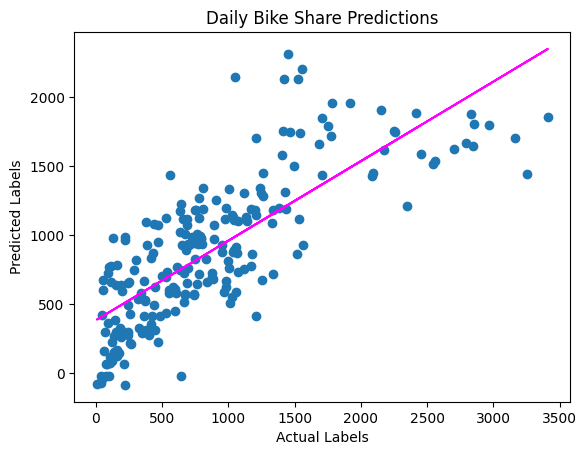

In [2]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Prueba un algoritmo de árbol de decisión

Como alternativa a un modelo lineal, existe una categoría de algoritmos para el aprendizaje automático que utiliza un enfoque basado en árboles en el que las características en el conjunto de datos se examinan en una serie de evaluaciones, cada una de los cuales da como resultado una *rama* en un *Árbol de decisión* basado en el valor de la característica. Al final de cada serie de ramas hay nodos-hoja con el valor de la etiqueta predicha en función de los valores de la característica.

Es más fácil ver cómo funciona esto con un ejemplo. Vamos a entrenar un modelo de regresión de árbol de decisión utilizando los datos de alquiler de bicicletas. Después de entrenar el modelo, el siguiente código imprimirá la definición del modelo y una representación de texto del árbol que utiliza para predecir los valores de las etiquetas.

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_6 <= 0.45
|   |--- feature_4 <= 0.50
|   |   |--- feature_7 <= 0.32
|   |   |   |--- feature_8 <= 0.41
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_3 <= 3.00
|   |   |   |   |   |   |--- feature_6 <= 0.28
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |   |   |--- feature_6 >  0.28
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |   |--- feature_3 >  3.00
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- feature_8 <= 0.40
|   |   |   |   |   |   |--- feature_6 <= 0.28
|   |   |   |   |   |   |   |--- value: [981.00]
|   |   |   |   |   |   |--- feature_6 >  0.28
|   |   |   |   |   |   |   |--- value: [968.00]
|   |   |   |   |   |--- feature_8 >  0.40
|   |   |   |   |   |   |--- feature_3 <= 3.00
|   |   |   |   |   |   |   |--- value: [710.00]
|   |   |   |   |   |   |--- feature_3 >  3.00
|   |   |   |   |   |   |   |--- val

Ya tenemos un modelo basado en árboles, pero ¿es bueno? Evaluémoslo con los datos de prueba.

MSE: 268368.0
RMSE: 518.0424693015043
R2: 0.47388137975325617


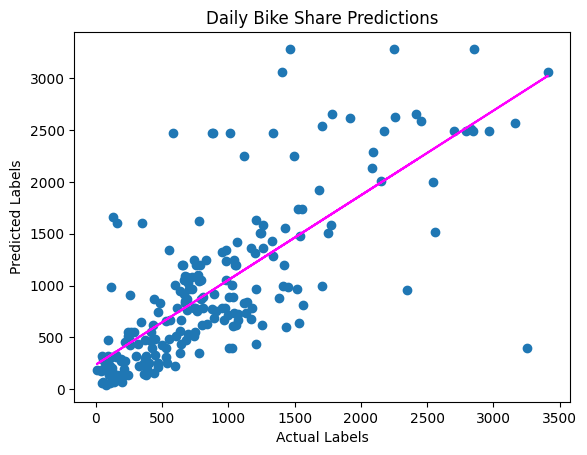

In [4]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

El modelo basado en árboles no parece haber mejorado con respecto al modelo lineal, así que, ¿qué más podríamos probar?

### Prueba un algoritmo de conjunto

Los algoritmos de conjunto funcionan combinando múltiples estimadores base para producir un modelo óptimo, ya sea aplicando una función agregada a una colección de modelos base (a veces referidos a un *bagging*) o construyendo una secuencia de modelos que se basan unos en otros para mejorar el rendimiento predictivo (lo que se denomina *boosting*).

Por ejemplo, probemos un modelo de bosque aleatorio, que aplica una función de promediado a múltiples modelos de árboles de decisión para obtener un mejor modelo general.

RandomForestRegressor() 

MSE: 114810.91956863637
RMSE: 338.8376005826927
R2: 0.7749203981372188


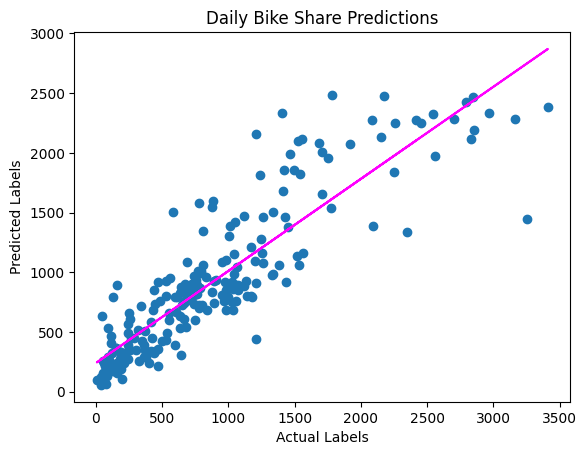

In [5]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

En buena medida, probemos también un algoritmo de conjunto *boosting*. Usaremos un estimador Gradient Boosting, que, al igual que el algoritmo Random Forest, construye múltiples árboles; pero en lugar de construirlos todos de forma independiente y tomar el resultado promedio, cada árbol se construye sobre los resultados del anterior en un intento de reducir progresivamente la *pérdida* (error) en el modelo.

GradientBoostingRegressor() 

MSE: 104135.20265950842
RMSE: 322.6998646722809
R2: 0.7958494710906829


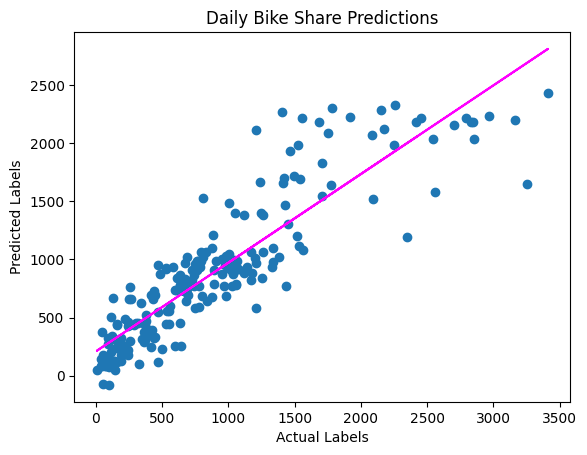

In [6]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Resumen

Aquí, hemos probado una serie de nuevos algoritmos de regresión para mejorar el rendimiento. En nuestro próximo cuaderno, veremos *ajustar* estos algoritmos para mejorar el rendimiento.

## Lecturas Adicionales
Para obtener más información sobre Scikit-Learn, consulte [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics).